## Challenge Set 6
Topic: Classification Errors Challenges  
Date: 07/29/2016  
Name: Kevin Cole 

In [2]:
import pandas as pd
%matplotlib inline
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

## Challenge 1


In [28]:
df = pd.read_csv('../../../challenges_data/house-votes-84.data', header = None)

In [29]:
df = df.replace('y', 1)
df = df.replace('n', 0)

for col in df.columns[df.columns != 16]:
    df[col] = df[col].replace('?', np.mean(df[col][df[col] != '?']))
    
df[16] = df[16].str.replace('.', '')
df[16] = df[16].replace('republican', 0)
df[16] = df[16].replace('democrat', 1)

In [30]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.362319,1.0,1.0,1.0,0.0,1.000000,0
1,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,0.0,0.812689,0


In [31]:
from sklearn.cross_validation import train_test_split

y, X = np.ravel(df[[16]]), df.drop([16], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

acc_score = {}
pre_score = {}
rec_score = {}
f_one_score = {}

for i in range(1,21):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    acc_score[i] = accuracy_score(y_test, neigh.predict(X_test))
    pre_score[i] = precision_score(y_test, neigh.predict(X_test))
    rec_score[i] = recall_score(y_test, neigh.predict(X_test))
    f_one_score[i] = f1_score(y_test, neigh.predict(X_test))

In [37]:
high = max(acc_score, key=lambda i: acc_score[i])
print(high, acc_score[high])
high = max(pre_score, key=lambda i: pre_score[i])
print(high, pre_score[high])
high = max(rec_score, key=lambda i: rec_score[i])
print(high, rec_score[high])
high = max(f_one_score, key=lambda i: f_one_score[i])
print(high, f_one_score[high])

3 0.908256880734
4 0.966666666667
3 0.89552238806
3 0.923076923077


## Challenge 2

In [39]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()

from sklearn.svm import SVC
svc_model = SVC()

from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()

fpr 0.0333333333333
tpr 0.947368421053
AUC score: 0.95701754386


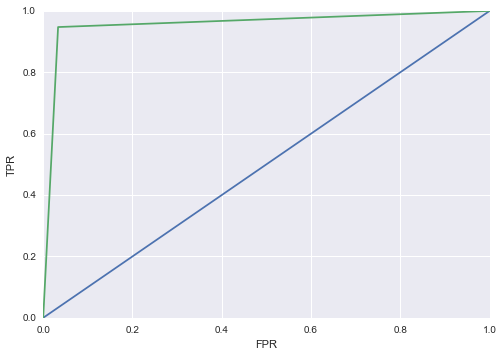

In [52]:
from sklearn import metrics

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)
ytrain=np.ravel(ytrain)

clf = log_model.fit(xtrain, ytrain)

print ('fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1])
print ('tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1])
    
roc=metrics.roc_curve(ytest,clf.predict(xtest))
auc=metrics.roc_auc_score(ytest,clf.predict(xtest))
print('AUC score:', auc)
plt.figure()
# Plotting our Baseline! 
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')

fpr 0.1
tpr 0.929824561404
AUC score: 0.914912280702


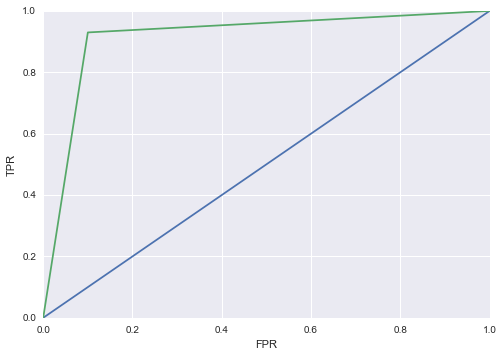

In [54]:
from sklearn import metrics

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)
ytrain=np.ravel(ytrain)

clf = Gmodel.fit(xtrain, ytrain)

print ('fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1])
print ('tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1])
    
roc=metrics.roc_curve(ytest,clf.predict(xtest))
auc=metrics.roc_auc_score(ytest,clf.predict(xtest))
print('AUC score:', auc)
plt.figure()
# Plotting our Baseline! 
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')

fpr 0.0333333333333
tpr 0.929824561404
AUC score: 0.948245614035


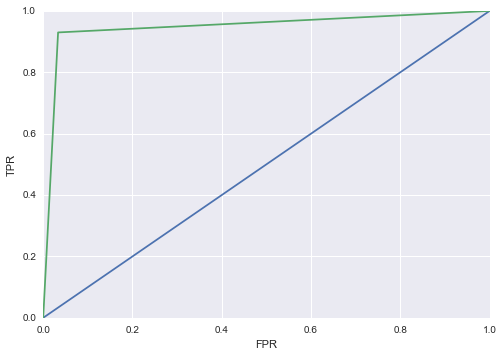

In [55]:
from sklearn import metrics

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)
ytrain=np.ravel(ytrain)

clf = svc_model.fit(xtrain, ytrain)

print ('fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1])
print ('tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1])
    
roc=metrics.roc_curve(ytest,clf.predict(xtest))
auc=metrics.roc_auc_score(ytest,clf.predict(xtest))
print('AUC score:', auc)
plt.figure()
# Plotting our Baseline! 
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')

fpr 0.0333333333333
tpr 0.912280701754
AUC score: 0.939473684211


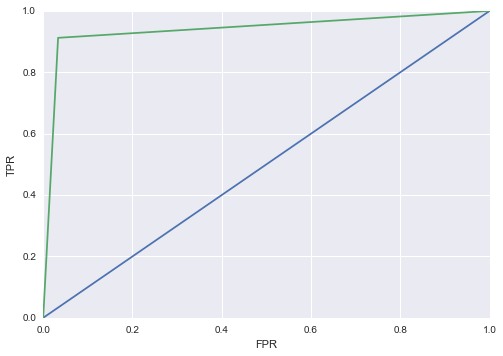

In [56]:
from sklearn import metrics

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)
ytrain=np.ravel(ytrain)

clf = dtc_model.fit(xtrain, ytrain)

print ('fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1])
print ('tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1])
    
roc=metrics.roc_curve(ytest,clf.predict(xtest))
auc=metrics.roc_auc_score(ytest,clf.predict(xtest))
print('AUC score:', auc)
plt.figure()
# Plotting our Baseline! 
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')

fpr 0.0333333333333
tpr 0.929824561404
AUC score: 0.948245614035


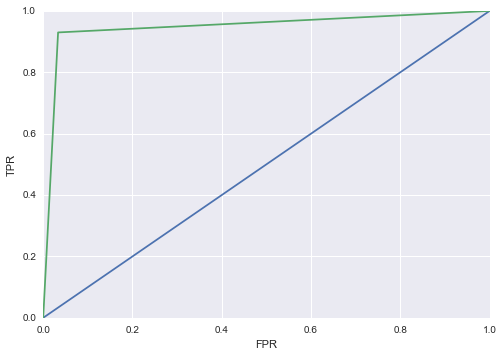

In [57]:
from sklearn import metrics

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)
ytrain=np.ravel(ytrain)

clf = rfc_model.fit(xtrain, ytrain)

print ('fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1])
print ('tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1])
    
roc=metrics.roc_curve(ytest,clf.predict(xtest))
auc=metrics.roc_auc_score(ytest,clf.predict(xtest))
print('AUC score:', auc)
plt.figure()
# Plotting our Baseline! 
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')

## Challenge 3

In [61]:
from sklearn.cross_validation import cross_val_score

gaus_model = GaussianNB()
gaus_model.fit(X_train, y_train)
print(np.mean(cross_val_score(gaus_model, X_train, y_train, scoring = 'precision')))
print(np.mean(cross_val_score(gaus_model, X_train, y_train, scoring = 'recall')))
print(np.mean(cross_val_score(gaus_model, X_train, y_train, scoring = 'f1')))

0.969847731042
0.965098748681
0.967418546366


In [62]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
print(np.mean(cross_val_score(svc_model, X_train, y_train, scoring = 'precision')))
print(np.mean(cross_val_score(svc_model, X_train, y_train, scoring = 'recall')))
print(np.mean(cross_val_score(svc_model, X_train, y_train, scoring = 'f1')))

0.979557703905
0.965098748681
0.972162665737


In [63]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train, y_train)
print(np.mean(cross_val_score(rfc_model, X_train, y_train, scoring = 'precision')))
print(np.mean(cross_val_score(rfc_model, X_train, y_train, scoring = 'recall')))
print(np.mean(cross_val_score(rfc_model, X_train, y_train, scoring = 'f1')))

0.969909502262
0.965023368008
0.974668654312


## Challenge 4

In [64]:
movies = pd.read_csv('~/ds/metis/nyc16_ds8/challenges/challenges_data/2013_movies.csv')

In [65]:
#get rid of NaNs

movies = movies.dropna()

y, X = np.ravel(movies[['Rating']]), movies.drop(['Rating', 'Title', 'Director', "ReleaseDate"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [68]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
pre_acc = precision_score(y_test, log_model.predict(X_test))
rec_acc = recall_score(y_test, log_model.predict(X_test))

print(pre_acc)
print(rec_acc)

0.395454545455
0.409090909091


/Users/colekev/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/colekev/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/colekev/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclas

## Challenge 5

In [69]:
hsd = pd.read_csv('../../../challenges_data/haberman.data', 
                  names=['age', 'year', 'pos_nodes', 'survival'])

In [73]:
hsd['survival'] = hsd.survival.replace(2, 0)

fpr 0.904761904762
tpr 0.951219512195
AUC score: 0.523228803717


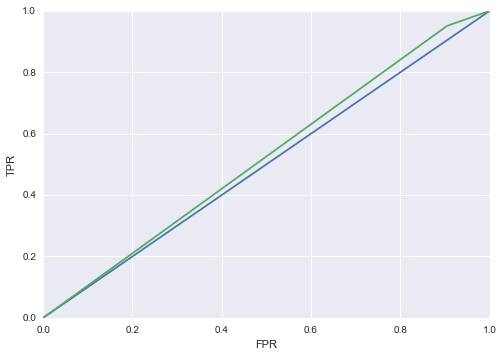

In [74]:
y, X = np.ravel(hsd[['survival']]), hsd.drop(['survival'], axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1234)
ytrain=np.ravel(ytrain)

log_model = LogisticRegression()

clf = log_model.fit(xtrain, ytrain)

print ('fpr', metrics.roc_curve(ytest, clf.predict(xtest))[0][1])
print ('tpr', metrics.roc_curve(ytest, clf.predict(xtest))[1][1])
    
roc=metrics.roc_curve(ytest,clf.predict(xtest))
auc=metrics.roc_auc_score(ytest,clf.predict(xtest))
print('AUC score:', auc)
plt.figure()
# Plotting our Baseline! 
plt.plot([0,1],[0,1])
plt.plot(roc[0],roc[1])
plt.xlabel('FPR')
plt.ylabel('TPR')